Importing library

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score,root_mean_squared_error,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.cluster import KMeans,DBSCAN
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
df = pd.read_csv("../data/house_price_regression_dataset.csv",sep=",")
df = df.drop(2)

In [30]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
5,3944,5,3,1990,2.475930,2,8,8.797970e+05
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        999 non-null    int64  
 1   Num_Bedrooms          999 non-null    int64  
 2   Num_Bathrooms         999 non-null    int64  
 3   Year_Built            999 non-null    int64  
 4   Lot_Size              999 non-null    float64
 5   Garage_Size           999 non-null    int64  
 6   Neighborhood_Quality  999 non-null    int64  
 7   House_Price           999 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 70.2 KB


In [32]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02
mean,2814.644645,2.991992,1.972973,1986.520521,2.777230,1.023023,5.611612,6.187017e+05
std,1255.902984,1.426888,0.820742,20.622170,1.298270,0.814738,2.886515,2.536450e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.000000,2.000000,1.000000,1969.000000,1.664644,0.000000,3.000000,4.012940e+05
50%,2862.000000,3.000000,2.000000,1986.000000,2.809324,1.000000,6.000000,6.279236e+05
75%,3851.000000,4.000000,3.000000,2004.000000,3.924725,2.000000,8.000000,8.271421e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [33]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [34]:
assert df.isnull().sum().all() == 0, "Dataset have nullavble values"

In [3]:
X = df.drop('House_Price',axis=1)
y = df["House_Price"]

In [6]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

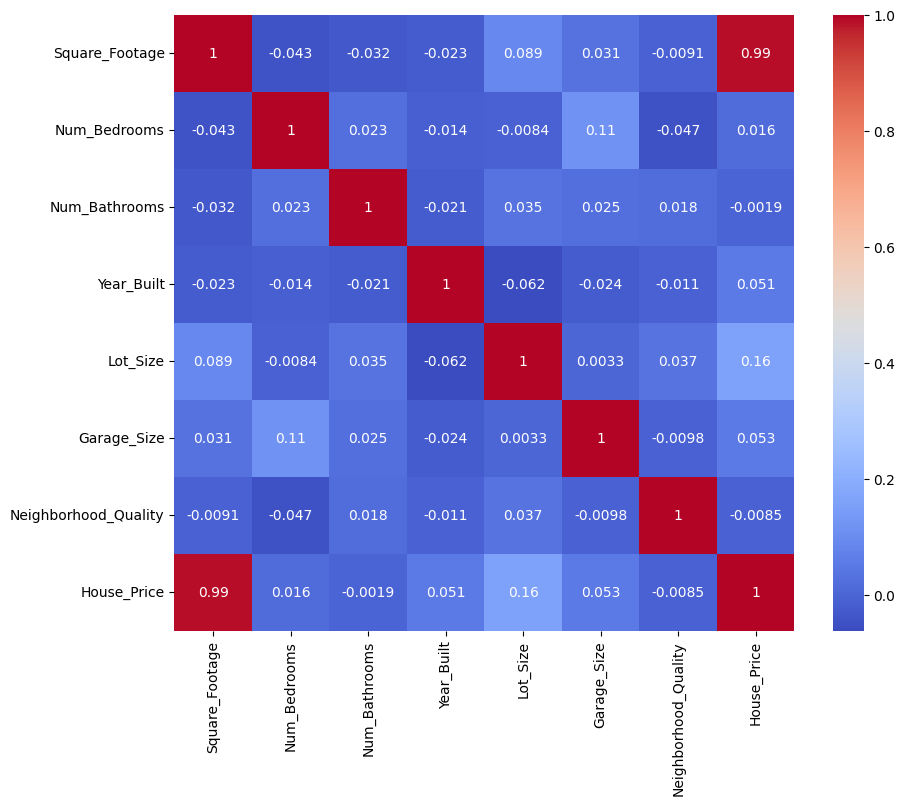

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'MSE - {mse}')
print(f'R2 Score - {r2}')

MSE - 89272986.06406902
R2 Score - 0.9986253545059945


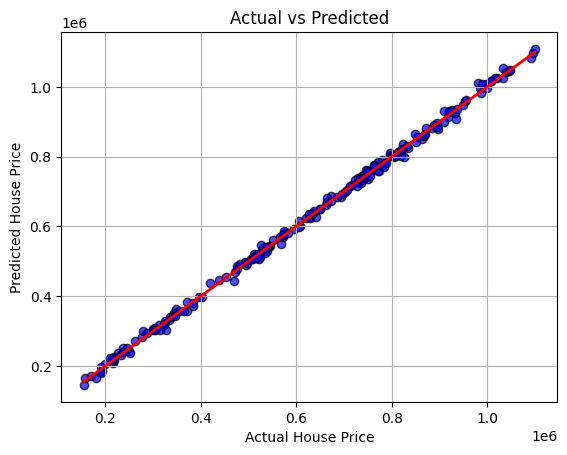

In [19]:
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()
